In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [2]:
x1 = np.array([958, 38, 1])
y1 = np.array([933, 33, 1])

x2 = np.array([1117, 111, 1])
y2 = np.array([1027, 132, 1])

x3 = np.array([874, 285, 1])
y3 = np.array([692, 223, 1])

x4 = np.array([707, 218, 1])
y4 = np.array([595, 123, 1])

x6 = np.array([1094, 536, 1])
y6 = np.array([980, 535, 1])

x7 = np.array([862, 729, 1])
y7 = np.array([652, 638, 1])

x8 = np.array([710, 648, 1])
y8 = np.array([567, 532, 1])

x9 = np.array([292, 569, 1])
y9 = np.array([272, 360, 1])

x10 = np.array([770, 969, 1])
y10 = np.array([432, 814, 1])

x11 = np.array([770, 1465, 1])
y11 = np.array([414, 1284, 1])

x12 = np.array([317, 1057, 1])
y12 = np.array([258, 818, 1])

y13 = np.array([1077, 269, 1])

x14 = np.array([1487, 598, 1])
y14 = np.array([1303, 700, 1])

x15 = np.array([1462, 1079, 1])
y15 = np.array([1257, 1165, 1])

In [3]:
xs = [x1, x2, x3, x4, x9, x10, x11, x12]
ys = [y1, y2, y3, y4, y9, y10, y11, y12]

In [4]:
def invisible_point(A, B, C, D, X1, X2):
    
    def cross(a, b):
        c1 = int(a[1]) * int(b[2]) - int(a[2]) * int(b[1])
        c2 = int(a[2]) * int(b[0]) - int(a[0]) * int(b[2]) 
        c3 = int(a[0]) * int(b[1]) - int(a[1]) * int(b[0])

        return [c1,c2,c3]

    cross_product = np.array(
        cross(cross(cross(cross(A[0], A[1]), cross(B[0], B[1])), X1),
        cross(cross(cross(C[0], C[1]), cross(D[0], D[1])), X2)
    ))
    
    cross_product = cross_product / cross_product[-1]

    return cross_product

## Calculating fundamental matrix

In [5]:
A = []
for i in range(len(xs)):
    B = np.array([xs[i][0] * ys[i][0] , xs[i][1] * ys[i][0] , xs[i][2] * ys[i][0], 
                  xs[i][0] * ys[i][1] , xs[i][1] * ys[i][1] , xs[i][2] * ys[i][1], 
                  xs[i][0] * ys[i][2] , xs[i][1] * ys[i][2] , xs[i][2] * ys[i][2]])
    
    if len(A) == 0:
        A = B   
    else:
        A = np.vstack((A, B))

print(A)

[[ 893814   35454     933   31614    1254      33     958      38       1]
 [1147159  113997    1027  147444   14652     132    1117     111       1]
 [ 604808  197220     692  194902   63555     223     874     285       1]
 [ 420665  129710     595   86961   26814     123     707     218       1]
 [  79424  154768     272  105120  204840     360     292     569       1]
 [ 332640  418608     432  626780  788766     814     770     969       1]
 [ 318780  606510     414  988680 1881060    1284     770    1465       1]
 [  81786  272706     258  259306  864626     818     317    1057       1]]


In [6]:
U, S, V = np.linalg.svd(A)
F = V[-1].reshape((3, 3))
print(f'Fundamental matrix:\n{F}')

Fundamental matrix:
[[ 4.54020258e-07 -7.42529108e-07 -1.86611244e-03]
 [-1.99099442e-07  2.11775653e-07  2.77795603e-03]
 [ 3.96239362e-04 -2.72717967e-03  9.99990603e-01]]


## Test

Brojevi koji se dobiju su izuzetno bliski nuli - postoji numericka greska

In [7]:
lst = zip(xs, ys)
np.array(list(map(lambda X: np.transpose(X[1]).dot(F).dot(X[0]), lst)))

array([ 2.22044605e-16,  2.09832152e-14,  1.02140518e-14,  3.24740235e-15,
        1.37667655e-14, -1.55431223e-14, -5.50670620e-14, -4.61852778e-14])

## Calculating epipoles

In [8]:
U, D, V = np.linalg.svd(F)
e1 = V[:][-1]
e1 = e1 / e1[2]
print(f'e1 = {e1}')

e1 = [1.04078394e+04 1.87885919e+03 1.00000000e+00]


In [9]:
e2 = U[:, -1]
e2 = e2 / e2[2]
print(f'e2 = {e2}')

e2 = [-4.38831707e+03 -3.30785789e+03  1.00000000e+00]


## Correct precision of fundamental matrix

In [10]:
D1 = np.diag([1, 1, 0]) * D

In [11]:
F1 = U.dot(D1).dot(V)
print(f'Corrected values:\n {F1}')

Corrected values:
 [[ 3.17782475e-07 -7.67123224e-07 -1.86611245e-03]
 [-3.01793759e-07  1.93236919e-07  2.77795602e-03]
 [ 3.96239393e-04 -2.72717967e-03  9.99990603e-01]]


In [12]:
print(f'det(F1) = {np.linalg.det(F1)}')

det(F1) = 6.474662161633092e-28


## Reconstruction

In [13]:
T1 = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0]
])
print(f'First camera matrix:\n{T1}')

First camera matrix:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]


In [14]:
E2 = np.array([
    [0, -e2[2], e2[1]],
    [e2[2], 0, -e2[0]],
    [-e2[1], e2[0], 0]
])

T2 = np.transpose(np.vstack((np.transpose(E2.dot(F1)), e2)))
print(f'Second camera matrix:\n{T2}')

Second camera matrix:
[[-1.31070330e+00  9.02112258e+00 -3.30782958e+03 -4.38831707e+03]
 [ 1.73882441e+00 -1.19677298e+01  4.38827396e+03 -3.30785789e+03]
 [ 2.37554597e-03 -3.38551948e-03 -1.83633866e+01  1.00000000e+00]]


In [15]:
def equations(X, Y):
    return np.array([X[1]*T1[2] - X[2]*T1[1],
                    -X[0]*T1[2] + X[2]*T1[0],
                    Y[1]*T2[2] - Y[2]*T2[1],
                    -Y[0]*T2[2] + Y[2]*T2[0]])

In [16]:
x1 = np.array([958, 38, 1])
y1 = np.array([933, 33, 1])

x2 = np.array([1117, 111, 1])
y2 = np.array([1027, 132, 1])

x3 = np.array([874, 285, 1])
y3 = np.array([692, 223, 1])

x4 = np.array([707, 218, 1])
y4 = np.array([595, 123, 1])

x6 = np.array([1094, 536, 1])
y6 = np.array([980, 535, 1])

x7 = np.array([862, 729, 1])
y7 = np.array([652, 638, 1])

x8 = np.array([710, 648, 1])
y8 = np.array([567, 532, 1])

x9 = np.array([292, 569, 1])
y9 = np.array([272, 360, 1])

x10 = np.array([770, 969, 1])
y10 = np.array([432, 814, 1])

x11 = np.array([770, 1465, 1])
y11 = np.array([414, 1284, 1])

x12 = np.array([317, 1057, 1])
y12 = np.array([258, 818, 1])

y13 = np.array([1077, 269, 1])

x14 = np.array([1487, 598, 1])
y14 = np.array([1303, 700, 1])

x15 = np.array([1462, 1079, 1])
y15 = np.array([1257, 1165, 1])

In [17]:
x5 = invisible_point((x4, x8), (x6, x2), (x1, x4), (x3, x2), x1, x8)
y5 = invisible_point((y4, y8), (y6, y2), (y1, y4), (y3, y2), y1, y8)

x13 = invisible_point((x9, x10), (x11, x12), (x11, x15), (x10, x14), x14, x9)

x16 = invisible_point((x10, x14), (x11, x15), (x9, x10), (x11, x12), x12, x15)
y16 = invisible_point((y10, y14), (y11, y15), (y9, y10), (y11, y12), y12, y15)

In [18]:
image1 = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16]
image2 = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16]

In [19]:
def coords(L, R):
    U, D, V = np.linalg.svd(equations(L, R))
    P = V[-1]
    P = P / P[3]
    return P[:-1]

In [20]:
reconstructed = []
for i in range(len(image1)):
    reconstructed.append(coords(image1[i], image2[i]))

In [21]:
reconstructed

[array([491.84353036,   1.59313908,   0.50901647]),
 array([5.04614316e+02, 2.83555175e+01, 4.47171241e-01]),
 array([462.90170064, 132.73681428,   0.52557536]),
 array([451.53824135, 124.86509964,   0.63476922]),
 array([383.89190414, 128.75144682,   0.3869947 ]),
 array([4.02597956e+02, 1.34081479e+02, 3.52730610e-01]),
 array([341.96774372, 238.66413756,   0.38548329]),
 array([318.68122559, 246.47859012,   0.43737882]),
 array([204.98231907, 390.5749795 ,   0.69865921]),
 array([299.38198471, 356.35677875,   0.38590733]),
 array([2.18131111e+02, 3.92907417e+02, 2.81440333e-01]),
 array([1.33994812e+02, 4.34968096e+02, 4.20089046e-01]),
 array([4.03656240e+02, 4.66525599e+01, 3.90891784e-01]),
 array([4.58570726e+02, 1.19093832e+02, 2.96527638e-01]),
 array([3.86631275e+02, 1.84150621e+02, 2.46041404e-01]),
 array([3.35122954e+02, 1.40205833e+02, 3.05634378e-01])]

In [22]:
tmp = np.eye(3)
tmp[2][2] = 400

reconstructed400 = np.zeros((16, 3))
for i in range(len(reconstructed)):
    reconstructed400[i] = tmp.dot(reconstructed[i])

In [23]:
small_edges = [
    (1, 2), (2, 3), (3, 4), (4, 1), (5, 6), (6, 7), (7, 8), (8, 5),
    (1, 5), (2, 6), (3, 7), (4, 8)
]

big_edges = [
    (9, 10), (10, 11), (11, 12), (12, 9), (13, 14), (14, 15), (15, 16),
    (16, 13), (9, 13), (10, 14), (11, 15), (12, 16)
]

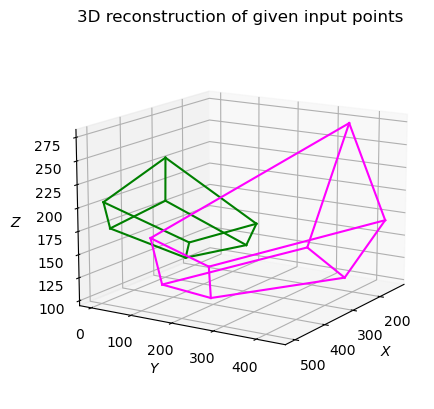

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(14, 32)

for (i, j) in small_edges:
    ax.plot(
        [reconstructed400[i - 1][0], reconstructed400[j - 1][0]],
        [reconstructed400[i - 1][1], reconstructed400[j - 1][1]],
        [reconstructed400[i - 1][2], reconstructed400[j - 1][2]],
        color= 'green'
    )

for (i, j) in big_edges:
    ax.plot(
        [reconstructed400[i - 1][0], reconstructed400[j - 1][0]],
        [reconstructed400[i - 1][1], reconstructed400[j - 1][1]],
        [reconstructed400[i - 1][2], reconstructed400[j - 1][2]],
        color= 'magenta'
    )
    
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
plt.title('3D reconstruction of given input points')
plt.show()